#  Real Estate-Price Predict

In [1]:
import pandas as pd  # Import the pandas library and give it the alias 'pd'.
# Pandas is a powerful Python library used for data manipulation and analysis.
# By importing it as 'pd', we can easily access its functions (like pd.read_csv, pd.DataFrame, etc.) throughout our code.

In [2]:
housing = pd.read_csv("data.csv")  # Load the dataset from 'data.csv' into a pandas DataFrame named 'housing'

In [3]:
housing.head()  # Display the first 5 rows of the 'housing' DataFrame to get a quick overview of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info  # This line accesses the 'info' method of the DataFrame, but does not call it. To display DataFrame info, use housing.info()

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [5]:
housing.info()  # Display a concise summary of the DataFrame, including index dtype, column dtypes, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:

%matplotlib inline 
# This line is used in Jupyter notebooks to display matplotlib plots inline, directly below the code cells that produce them.

In [8]:
import matplotlib.pyplot as plt
# Import the matplotlib library for plotting and give it the alias 'plt'.
# Matplotlib is a widely used library for creating static, animated, and interactive visualizations in Python.


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

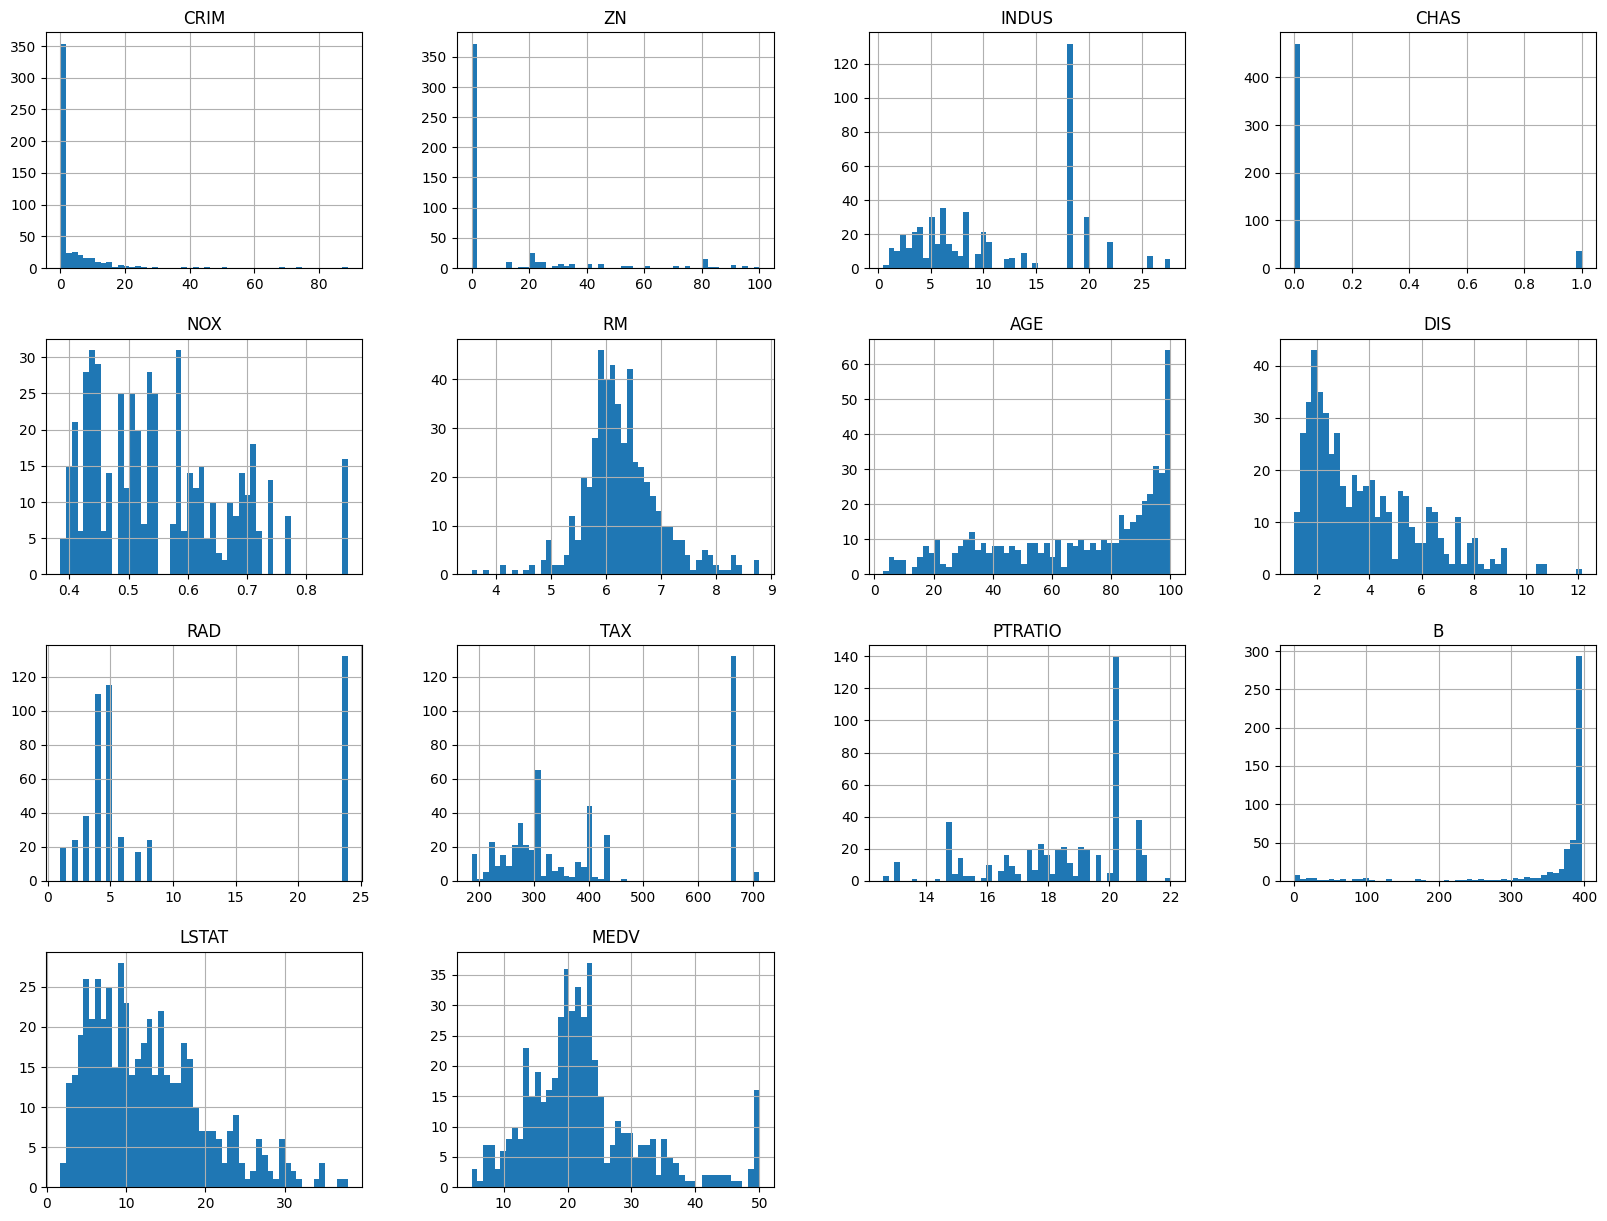

In [9]:
housing.hist(bins=50, figsize=(20, 15))
# Create a histogram for each numerical column in the 'housing' DataFrame.
# The 'bins' parameter specifies the number of bins to use for the histogram, and 'figsize' sets the size of the figure.

In [10]:
plt.show
# This line is intended to display the plots created by the previous command.

<function matplotlib.pyplot.show(close=None, block=None)>

 ## Test splitting
 

In [11]:
import numpy as np
# np.random.seed(42)
def split_test(data, test_ratio):# Function to split the dataset into a training set and a test set based on a specified test ratio.
    
    shuffled=np.random.permutation(len(data)) # Generate a random permutation of indices for the DataFrame 'data'.
    # This creates a shuffled array of indices from 0 to len(data)-1, which is used to randomly select rows for the test set.
    test_set=int(len(data)*test_ratio)# Calculate the number of samples to include in the test set based on the specified test ratio.
    # The test set size is determined by multiplying the total number of samples by the test ratio.
    test_indices=shuffled[:test_set]# Select the first 'test_set' indices from the shuffled array to form the test set.
    # These indices correspond to the rows in the DataFrame that will be included in the test set.
    train_indices=shuffled[test_set:]# The remaining indices after the test set are used for the training set.
    # This creates the training set by taking all indices after the test set indices.
    return data.iloc[train_indices],data.iloc[test_indices]# Return the training and test sets as DataFrames.
    
    
        

In [12]:
# training_set, testing_set= split_test(housing,0.2)

In [13]:
# print(f"Rows in train Set:{len(training_set)}\nRows in test set: {len(testing_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split# Import the train_test_split function from the sklearn.model_selection module.
# This function is used to split arrays or matrices into random train and test subsets.
training_set, testing_set= train_test_split(housing,test_size=0.2, random_state=42)# Split the 'housing' DataFrame into a training set and a test set.
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split (20% in this case).
print(f"Rows in train Set:{len(training_set)}\nRows in test set: {len(testing_set)}\n")# Print the number of rows in the training and test sets to verify the split.
# The 'random_state' parameter ensures that the split is reproducible, meaning the same random split will occur each time the code is run with this seed.

Rows in train Set:404
Rows in test set: 102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit  # Import StratifiedShuffleSplit for stratified sampling

# Create a StratifiedShuffleSplit object for one split, with 20% of data as test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split based on the 'CHAS' column to preserve its distribution in train/test sets
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]  # Select training set rows using train_index
    strat_test_set = housing.loc[test_index]    # Select test set rows using test_index
    


In [16]:
strat_test_set.describe()# Generate descriptive statistics (count, mean, std, min, max, quartiles) for each column in the stratified test set
housing= strat_train_set.copy()  # Create a copy of the stratified training set to work with, preventing changes to the original DataFrame

Looking for Correlations

In [17]:
# Looking for correlations helps us understand the relationships between different features in the dataset.

# By identifying which features are strongly correlated with the target variable (MEDV), we can select the most relevant predictors for our model.

# It also helps to detect multicollinearity (when two or more features are highly correlated with each other), which can negatively impact some machine learning algorithms.

# In summary, correlation analysis guides feature selection, improves model interpretability, and can lead to better predictive performance.

## Understanding Correlation with an Analogy

Imagine you are at a playground watching children play. You notice that as the number of children on the playground increases, the noise level also goes up. This is an example of **positive correlation**: when one thing increases, the other tends to increase as well.

Now, think about ice cream sales and the weather. On hotter days, more ice cream is sold. Again, this is a positive correlation.

On the other hand, if you look at the amount of time spent studying and the number of mistakes on a test, you might notice that as study time increases, mistakes decrease. This is a **negative correlation**: as one thing increases, the other decreases.

## Why Do We Use Correlation in Data Analysis?

Correlation helps us understand relationships between different features in our data. For example, in a real estate dataset, we might want to know if houses with more rooms tend to have higher prices. If there is a strong correlation, we can use this information to make better predictions.

**In simple terms:**  
Correlation is like finding patterns between things. If two things move together (up or down), they are correlated. This helps us decide which features are important for our analysis or model.

**Why implement it?**  
- To find which features are related to our target (like house price).
- To avoid using features that are too similar (which can confuse our model).
- To make our predictions more accurate and our models easier to understand.

In [18]:
corr_matrix = housing.corr()  # Calculate the correlation matrix for the training set
corr_matrix['MEDV'].sort_values(ascending=False)  # Sort the correlation values with 'MEDV' to see which features are most correlated with the median value of owner-occupied homes   

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

, -1 means strong negative correlation, and 0 means no correlation.

For example, from the output above, the feature `RM` (average number of rooms per dwelling) has a correlation of **0.70** with `MEDV` (median value of owner-occupied homes), indicating a strong positive relationship: as the number of rooms increases, the house price tends to increase.

On the other hand, `LSTAT` (percentage of lower status of the population) has a correlation of **-0.74** with `MEDV`, showing a strong negative relationship: as `LSTAT` increases, the house price tends to decrease.

Features with correlation values close to 0 (like `CHAS` at 0.17) have little to no linear relationship with `MEDV`. This analysis helps us identify which features are most relevant for predicting house prices.

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

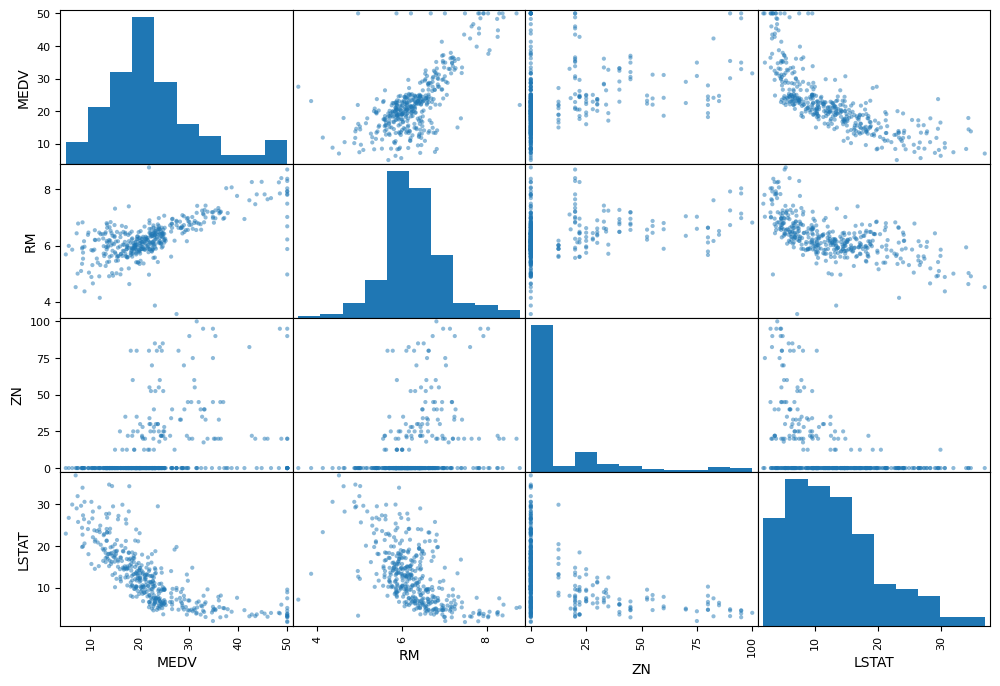

In [19]:
from pandas.plotting import scatter_matrix  # Import scatter_matrix for visualizing pairwise relationships in the dataset
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']  # Define a list of attributes to visualize
scatter_matrix(housing[attributes], figsize=(12, 8))  # Create a scatter matrix for the selected attributes

<Axes: xlabel='RM', ylabel='MEDV'>

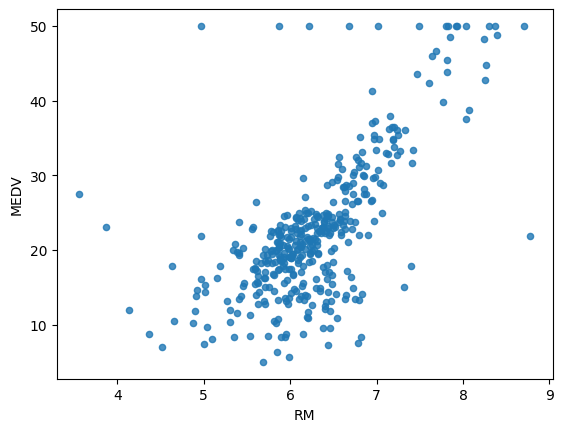

In [20]:
housing.plot(kind="scatter",x="RM", y="MEDV", alpha=0.8)  # Create a scatter plot of 'RM' (average number of rooms per dwelling) vs 'MEDV' (median value of owner-occupied homes)

# Benefits of scatter matrix and histogram matrix with correlation analysis:
 1. Visualize Relationships: Scatter matrices help you see pairwise relationships between features, making it easier to spot strong correlations or patterns.
 2. Detect Outliers: Both scatter plots and histograms can reveal outliers—points that deviate significantly from the general data distribution.
 3. Understand Distributions: Histogram matrices show the distribution of each feature, helping you identify skewness, multimodality, or unusual spread.
 4. Feature Selection: By visualizing correlations, you can identify redundant features (highly correlated with each other) and select the most relevant ones for your model.
 5. Spot Non-linear Relationships: Scatter plots can reveal non-linear trends that correlation coefficients alone might miss.

## Attribute Combination

In [21]:
housing["TAXRM"]=housing['TAX']/housing['RM']  #This creates a new feature that represents the tax rate per room, which #can provide insights into how property taxes relate to the number of rooms in a house.
housing["TAXRM"]




254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [22]:
housing.head()  # Display the first 5 rows of the 'housing' DataFrame to verify the data after all operations



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
coor_matrix = housing.corr()  # Calculate the correlation matrix for the 'housing' DataFrame
coor_matrix['MEDV'].sort_values(ascending=False)  # Sort the correlation values with 'MEDV' to see which features are most correlated with the median value of owner-occupied homes



MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

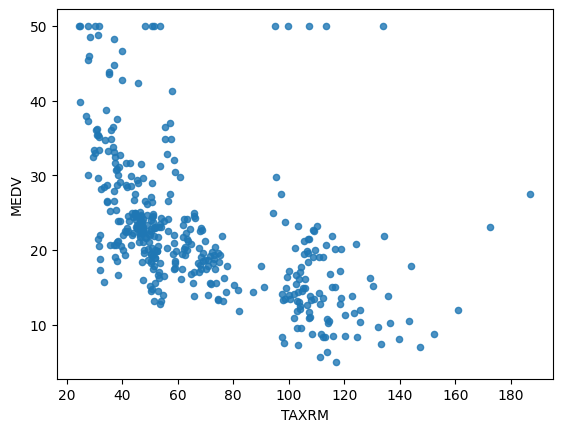

In [24]:
housing.plot(kind="scatter",x="TAXRM", y="MEDV", alpha=0.8)  # Create a scatter plot of 'TAXRM' (tax rate per room) vs 'MEDV' (median value of owner-occupied homes)

In [25]:
housing=strat_train_set.drop("MEDV", axis=1) # Drop the 'MEDV' column from the training set to prepare for model training
housing_labels = strat_train_set["MEDV"].copy()  # Create a copy of the 'MEDV' column as 'housing_labels' for model training

##  Missing Attributes
Missing attributes can significantly impact the performance of machine learning models
# To tackle missing attributes, we have 3 common strategies:
1. **Remove Rows with Missing Values**: This is the simplest approach, but it can lead to loss of valuable data, especially if many rows have missing values.

2. **Impute Missing Values**: Replace missing values with a statistic (like mean, median, or mode) or use more advanced techniques like KNN imputation (MOST APPROPRIATE).

3. **Get rid of the whole attribute**: If an attribute has too many missing values or is not relevant, it might be best to remove it entirely from the dataset.


e.g. RM has missing values


In [26]:
a=housing.dropna(subset=['RM'])  # Drop rows from the 'housing' DataFrame where 'RM' (average number of rooms per dwelling) is NaN(e.g., RM has some missing values)
# dropna()= This method is used to remove missing values from the DataFrame.

In [27]:
housing.drop('RM', axis=1)  # Drop the 'RM' column from the 'housing' DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [28]:
median = housing['RM'].median()  # Calculate the median value of the 'RM' column in the 'housing' DataFrame
housing['RM'].fillna(median)  # Fill NaN values in the 'RM' column with the median value, modifying the DataFrame in place
#fillna()= This method is used to fill NaN values with a specified value (in this case, the median of the 'RM' column).

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
from sklearn.impute  import SimpleImputer # Import the SimpleImputer class from sklearn.preprocessing for handling missing values
imputer = SimpleImputer(strategy="median")  # Create an imputer object with the strategy set to "median" to fill the missing values in the dataset
imputer.fit (housing) #Fit imputer to the "housing Dataframe to compute the median values from the dataset"

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_  # Access the computed median values for each column in the 'housing' DataFrame

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X=imputer.transform(housing)  # Transform the 'housing' DataFrame using the imputer to fill missing values with the computed median values
housing_tr=pd.DataFrame(X, columns=housing.columns) #creates a new dataframe 'housing_tr' with the transformed data 'X' and the same columns as the original 'housing' dataframe

## SciKit-Learn Design

Primarily threee types of objects in scikit-learn:
1. **Estimators**: These are classes that implement the `fit` method to learn from data. Examples include linear regression, decision trees, and clustering algorithms. They can also have a `predict` method to make predictions based on the learned model.
2. **Transformers**: These are classes that implement the `fit` and `transform` methods. They are used to preprocess data, such as scaling features or encoding categorical variables. Transformers can also be chained together using `Pipeline` objects.
3. **Predictors**: These are classes that implement the `fit`, `predict`, and sometimes `score` methods. They are used for making predictions based on the learned model, such as classifiers or regressors.

##Feature Scaling
# Feature scaling is essential in machine learning because it ensures that all features contribute equally to the model's performance.
1.Min-Max Scaling(Normalisation): value-min/(max-min)
2.Standarization:(value -mean)/std

## Creating a Pipeline

In [32]:
from sklearn.pipeline import Pipeline # Import the Pipeline class from sklearn.pipeline for creating machine learning pipelines
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing for standardizing features by the mean and standard deviation

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),# Create a pipeline step named imputer that used  simple  imputer to fill missing values with median of entire dataset 
    ('std_scaler', StandardScaler())# standarize the dataset using standard scalar to scale features to have mean=0 and variance=1
    
])

In [33]:
housing_num_tr= my_pipeline.fit_transform(housing) # fit the pipeline to the 'housing' Dataframe and transform it, resulting in a Numpy array 'data.csv
housing_num_tr# Convert the transformed data back to a pandas DataFrame
housing_num_tr.shape

(404, 13)

## Selecting a Desired Model


Note: We can try any number of models to try out.


e.g. We can try Linear Regression, Decision Tree, Random Forest, etc.

In [36]:
from sklearn.linear_model import LinearRegression # Import the linear regression model from sklearn library to perform linear regression analysis
model=LinearRegression()# Create an instance of the LinearRegression model
model.fit(housing_num_tr, housing_labels)# Fit the linear regression model to the training data (housing_num_tr) and the corresponding labels (housing_labels)
 

LinearRegression()

In [39]:
some_data= housing.iloc[:5] #iloc= This method is used to select the first 5 rows of the 'housing' DataFrame.
# Select the first 5 rows of the 'housing' DataFrame to make predictions
some_labels=housing_labels.iloc[:5]# selecting the first 5 labels from the 'housing_labels' Series

# now we will use the model to make predictions on the selected data

In [41]:
prepared_data=my_pipeline.transform(some_data) # transform ther selected data using the pipeline which we created

Now we will predict the the selected data

In [ ]:
model.predict(prepared_data)# this wil give us an array of predicted values for the first 5 rows of the 'housing' DataFrame based on the fitted linear regression model

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

we will check the predictions against the actual labels to see how well the model performs

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Now we will evaluate our model whether it is good or not

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr) # Use the fitted model to make predictions on the training data
lin_mse=mean_squared_error(housing_labels,housing_predictions)  # Calculate the mean squared error between the actual labels and the predicted values
lin_rmse=np.sqrt(lin_mse)  # Calculate the root mean squared error by taking the square root of the mean squared error


In [79]:
lin_rmse

4.835301058716238

 we got 23 as the mean squared error, which is very heavy and not good  we have to improve and change the model

Now we will use  the *decision tree* regression model and so same to same as regression model

In [83]:
from sklearn.tree import DecisionTreeRegressor # Import the DecisionTreeRegressor class from sklearn.tree for building decision tree regression models \
from sklearn.ensemble import RandomForestRegressor  # Import the RandomForestRegressor class from sklearn.ensemble for building random forest regression models

# modeld=DecisionTreeRegressor()# Create an instance of the DecisionTreeRegressor model
modeld=RandomForestRegressor()
modeld.fit(housing_num_tr, housing_labels)  # Fit the decision tree regression model to the training data and labels
  # Use the fitted model to make predictions on the training data

RandomForestRegressor()

In [87]:
sd_data=housing.iloc[:5]  # Select the first 5 rows of the 'housing' DataFrame to make predictions for decison tree regression
sd_labels=housing_labels.iloc[:5]  # Select the first 5 labels from the 'housing_labels' Series
pd_data=my_pipeline.transform(sd_data)  # Transform the selected data using the previously defined pipeline
modeld.predict(pd_data)  # Use the fitted decision tree regression model to make predictions on the transformed data

array([22.203, 25.434, 16.843, 23.172, 23.568])

In [86]:
list(sd_labels) # Convert the 'some_labels' Series to a list for easier comparison with predictions

[21.9, 24.5, 16.7, 23.1, 23.0]

#now same as above test the decision tree model

In [88]:
housing_prediction_decision=model.predict(housing_num_tr)  # Use the fitted decision tree regression model to make predictions on the training data
lin_mse_decision= mean_squared_error(housing_labels,housing_prediction_decision)
lin_rmse_decision=np.sqrt(lin_mse_decision)  # Calculate the root mean squared error for the decision tree regression model
lin_mse_decision  # Display the mean squared error for the decision tree regression model

0.0

we got 0 as the erroe which is not posssible it is beacase of overfitting, which means the model is too complex and has memorized the training data instead of learning from it.
# using better evaluation technique - Cross Validation 
Cross-validation is a technique to check how well your model will work on new, unseen data. Instead of training and testing your model on the same data (which can lead to overfitting), cross-validation splits your data into several parts (called "folds"). The model is trained on some folds and tested on the remaining fold. This process repeats so every part gets a chance to be the test set. In the end, you get an average score that tells you how well your model is likely to perform in real life. This helps you choose the best model and avoid overfitting.

In [89]:
from sklearn.model_selection import cross_val_score
# Cross-validation is a technique used to assess how well a model generalizes to an independent dataset. It involves splitting the dataset into multiple subsets (folds), training the model on some folds, and validating it on the remaining folds. This process is repeated several times, and the results are averaged to provide a more reliable estimate of the model's performance.      
scores = cross_val_score(modeld, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)  # Perform 10-fold cross-validation on the decision tree regression model
rmse_scores=np.sqrt(-scores)  # Calculate the root mean squared error for each fold by taking the square root of the negative scores
rmse_scores

array([2.91615059, 2.96447772, 4.56155862, 2.52245711, 3.49420656,
       2.74069816, 4.93700623, 3.31459273, 3.24097647, 3.25938417])

In [90]:
def display_scores(scores):  # Define a function to display the mean and standard deviation of the scores
    print("Scores:", scores)  # Print the individual scores
    print("Mean:", scores.mean())  # Print the mean of the scores
    print("Standard deviation:", scores.std())  # Print the standard deviation of the scores

In [91]:
print(display_scores(rmse_scores))  # Call the display_scores function to show the scores, mean, and standard deviation

Scores: [2.91615059 2.96447772 4.56155862 2.52245711 3.49420656 2.74069816
 4.93700623 3.31459273 3.24097647 3.25938417]
Mean: 3.395150835794449
Standard deviation: 0.7349253253566594
None


here *RandomForestRegressor* worked best giving us the lowest RMSE score compared to the DecisionTreeRegressor and LinearRegression models.

# We have saved the model
With the best model selected, we can save it for future use. This allows us to reuse the trained model without needing to retrain it every time we want to make predictions.

In [100]:
from joblib import dump, load  # Import the dump and load functions from joblib for saving and loading models
dump(modeld,"housing_model.joblib")  # Save the fitted model to a file named 'housing_model.joblib' using joblib's dump function


['housing_model.joblib']

# Testing the model on test data


In [102]:
X_test=strat_test_set.drop("MEDV", axis=1)  # Features
y_test=strat_test_set["MEDV"].copy()  # Target variable     
X_test_prepared = my_pipeline.transform(X_test)  # Transform the test features using the previously defined pipeline
final_predictions = modeld.predict(X_test_prepared)  # Use the fitted model to make predictions on the transformed test features 
final_mse = mean_squared_error(y_test, final_predictions)  # Calculate the mean squared error between the actual test labels and the predicted values
final_rmse = np.sqrt(final_mse)  # Calculate the root mean squared error for the final predictions
print(final_rmse)  # Print the final root mean squared error to evaluate the model's performance on the test set

2.9168235039064623
